In [1]:
import os  
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import pandas as pd

In [3]:
diagnosis = pd.read_csv('diagnosis.csv', engine='python')

In [44]:
diagnosis

,patient_id,encounter_id,code_system,code,principal_diagnosis_indicator,admitting_diagnosis,reason_for_visit,date,derived_by_TriNetX,source_id
0,cb210c55a430cf6b0b7de17394af7ac1ef023b11,NaN,ICD-10-CM,C90.00,Unknown,F,F,20210317,T,TriNetX
1,09a69098466bb348bc9539b01f10e693779ae0d4,NaN,ICD-10-CM,C81.10,Unknown,F,F,20121226,T,TriNetX
2,09a69098466bb348bc9539b01f10e693779ae0d4,NaN,ICD-10-CM,C81.10,Unknown,F,F,20121226,T,TriNetX
3,1cfc222e0da79fc72ace45ebc1de9397705bc73b,NaN,ICD-10-CM,C91.00,Unknown,F,F,20121023,T,TriNetX
4,1fbf8e821935996fc627573341cf02237a203ff9,NaN,ICD-10-CM,C22.0,Unknown,F,F,20081229,T,TriNetX
...,...,...,...,...,...,...,...,...,...,...
299995,9ec142709d75d3ff3a6f4692fbc8c92e4a35be87,13d04420b5cbfc79ff41460d9f08d052ede3013a,ICD-10-CM,E78.5,Unknown,U,U,20211004,F,EHR
299996,9ec142709d75d3ff3a6f4692fbc8c92e4a35be87,0d6e40c2af0224e6407bfe791789baefa2a7e3bd,ICD-10-CM,E78.5,Unknown,U,U,20211227,F,EHR
299997,9ec142709d75d3ff3a6f4692fbc8c92e4a35be87,f903324b34e482f389ea56c4c326ebc828ca567c,ICD-10-CM,E78.5,Unknown,U,U,20220505,F,EHR
299998,9ec142709d75d3ff3a6f4692fbc8c92e4a35be87,a4b17011bc0bd4e75025cf74518e8f462fa67f4c,ICD-10-CM,E78.5,Unknown,U,U,20220809,F,EHR


In [45]:
diagnosis.to_pickle("diagnosis.pkl")

In [3]:
diagnosis = pd.read_pickle('diagnosis.pkl')

In [47]:
diagnosis.head(5)

,patient_id,encounter_id,code_system,code,principal_diagnosis_indicator,admitting_diagnosis,reason_for_visit,date,derived_by_TriNetX,source_id
0,cb210c55a430cf6b0b7de17394af7ac1ef023b11,NaN,ICD-10-CM,C90.00,Unknown,F,F,20210317,T,TriNetX
1,09a69098466bb348bc9539b01f10e693779ae0d4,NaN,ICD-10-CM,C81.10,Unknown,F,F,20121226,T,TriNetX
2,09a69098466bb348bc9539b01f10e693779ae0d4,NaN,ICD-10-CM,C81.10,Unknown,F,F,20121226,T,TriNetX
3,1cfc222e0da79fc72ace45ebc1de9397705bc73b,NaN,ICD-10-CM,C91.00,Unknown,F,F,20121023,T,TriNetX
4,1fbf8e821935996fc627573341cf02237a203ff9,NaN,ICD-10-CM,C22.0,Unknown,F,F,20081229,T,TriNetX


In [48]:
#Data types for each column
diagnosis.dtypes

patient_id                       object
encounter_id                     object
code_system                      object
code                             object
principal_diagnosis_indicator    object
admitting_diagnosis              object
reason_for_visit                 object
date                              int64
derived_by_TriNetX               object
source_id                        object
dtype: object

In [4]:
# Print number of unique diagnostic codes
print(len(diagnosis['code'].unique())) 

# Print number of times a diagnostic code was given
print(diagnosis['code'].value_counts())

48619
I10         1204499
E11.9        461644
R05          426210
E78.5        410625
Z00.00       388487
             ...   
S92.514B          1
S63.236D          1
S31.110D          1
Z45               1
C00.6             1
Name: code, Length: 48619, dtype: int64


In [5]:
# Prints unique values for principal diagnosis indicator
print(diagnosis['principal_diagnosis_indicator'].unique()) 

['Unknown' 'P' 'S']


In [6]:
# Prints unique values for admitting diagnosis
print(diagnosis['admitting_diagnosis'].unique()) 

['F' 'U']


In [7]:
# Prints unique values for reason_for_visit
print(diagnosis['reason_for_visit'].unique()) 

['F' 'U']


In [8]:
# Detect missing values
diagnosis.isna().sum()

patient_id                          0
encounter_id                     8619
code_system                      1498
code                                0
principal_diagnosis_indicator       0
admitting_diagnosis                 0
reason_for_visit                    0
date                                0
derived_by_TriNetX                  0
source_id                           0
dtype: int64

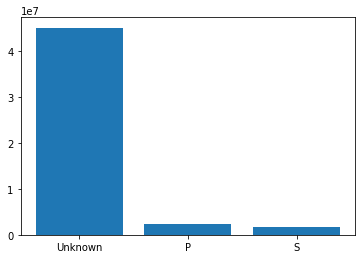

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

counts_1 = Counter(diagnosis['principal_diagnosis_indicator'])
plt.bar(counts_1.keys(), counts_1.values())
plt.show()

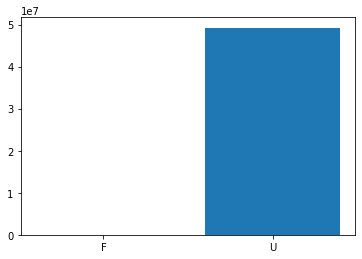

In [10]:
counts_2 = Counter(diagnosis['admitting_diagnosis'])
plt.bar(counts_2.keys(), counts_2.values())
plt.show()

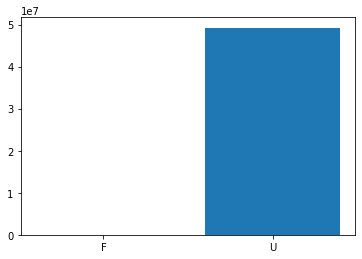

In [11]:
counts_3 = Counter(diagnosis['reason_for_visit'])
plt.bar(counts_3.keys(), counts_3.values())
plt.show()

In [12]:
diagnosis['admitting_diagnosis'] == "R05.3"

0           False
1           False
2           False
3           False
4           False
            ...  
49254406    False
49254407    False
49254408    False
49254409    False
49254410    False
Name: admitting_diagnosis, Length: 49254411, dtype: bool

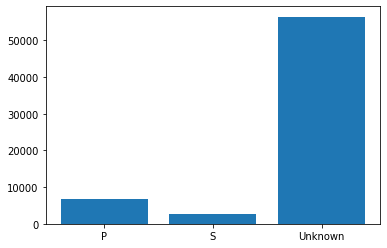

In [13]:
diagnosis_R05_3 = diagnosis[diagnosis['code']=='R05.3']
# some distribution plot
counts_4 = Counter(diagnosis_R05_3['principal_diagnosis_indicator'])
plt.bar(counts_4.keys(), counts_4.values())
plt.show()

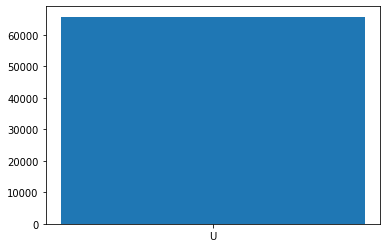

In [14]:
counts_5 = Counter(diagnosis_R05_3['admitting_diagnosis'])
plt.bar(counts_5.keys(), counts_5.values())
plt.show()

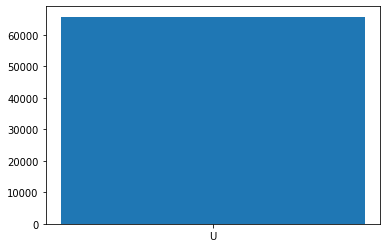

In [15]:
counts_6 = Counter(diagnosis_R05_3['reason_for_visit'])
plt.bar(counts_6.keys(), counts_6.values())
plt.show()

In [16]:
# get patient_id of patients with chronic cough(R05_3)
patient_id_R05_3 = diagnosis_R05_3['patient_id'].unique()

In [17]:
# get the diagnosis data of patients whoes id is in patient_id_R05_3
diagnosis_patient_with_R05_3 = diagnosis.loc[(diagnosis['patient_id'].isin(patient_id_R05_3)), ['patient_id', 'code', 'date']]

In [18]:
# extract the code in diagnosis_patient_with_R05_3 and calculate the frequency
code_freq = diagnosis_patient_with_R05_3['code'].value_counts()

In [19]:
diagnosis_R05_3

,patient_id,encounter_id,code_system,code,principal_diagnosis_indicator,admitting_diagnosis,reason_for_visit,date,derived_by_TriNetX,source_id
376,7a29b1cc4335620e52ab07bf7751f995d878c139,76c3bde411ecda592ab316d0a27433b30d12f08b,ICD-10-CM,R05.3,P,U,U,20221111,F,EHR
1054,8329230138a9a311e71060812d844741cfb77d8b,1ff7f8df7bdff491e7673747310d5771e5ddd5a0,ICD-10-CM,R05.3,P,U,U,20221128,F,EHR
1556,f66ee026fb262209448c09986b53f6f71c78034d,49df4abbe847d5da7ae50a549ea169c32d4252a2,ICD-10-CM,R05.3,P,U,U,20211203,F,EHR
1560,9afdeb8ec476203c3747bcf753efe02855be34d9,6b16d32dfc6f7e35075ca28e5d7fb538f197af42,ICD-10-CM,R05.3,P,U,U,20220314,F,EHR
1573,16f5643f12b474f974466c267c6dd2e977c72c5a,d04c73e045ed87ce8b443979da77f66e1b32c581,ICD-10-CM,R05.3,P,U,U,20220920,F,EHR
...,...,...,...,...,...,...,...,...,...,...
49241971,41d165f8519b34889f1b29271552e237c3449e59,8e0476823b438a197c24a3b3d5fe155b35673951,ICD-10-CM,R05.3,Unknown,U,U,20201015,F,NLP
49243090,f117eec4349c6b8cb2e8d4bb18835df706012bb3,ba84b337aaede807e81db5679d9bd69b81e5e38f,ICD-10-CM,R05.3,Unknown,U,U,20191212,F,NLP
49248557,05c740b29ae6fe696691ba09478f035edbf9d2fc,ea40473bcec3342a601f2126a803b2d13d0e0e0c,ICD-10-CM,R05.3,Unknown,U,U,20220502,F,NLP
49249384,c90d1023d4162e157f7a3eb2ddc85fe4c3bb6207,5c803b358105f03510847408756c68a74bbbed1f,ICD-10-CM,R05.3,Unknown,U,U,20190301,F,NLP


In [20]:
# calculate and plot the frequency of coughing increase or decrease at different points in the year?
#change ‘date’ into correct format
from datetime import datetime
diagnosis_R05_3['date'] = pd.to_datetime(diagnosis_R05_3['date'], format='%Y%m%d')
print(diagnosis_R05_3)

                                        patient_id  \
376       7a29b1cc4335620e52ab07bf7751f995d878c139   
1054      8329230138a9a311e71060812d844741cfb77d8b   
1556      f66ee026fb262209448c09986b53f6f71c78034d   
1560      9afdeb8ec476203c3747bcf753efe02855be34d9   
1573      16f5643f12b474f974466c267c6dd2e977c72c5a   
...                                            ...   
49241971  41d165f8519b34889f1b29271552e237c3449e59   
49243090  f117eec4349c6b8cb2e8d4bb18835df706012bb3   
49248557  05c740b29ae6fe696691ba09478f035edbf9d2fc   
49249384  c90d1023d4162e157f7a3eb2ddc85fe4c3bb6207   
49251701  965bd834e9d77644aec4216dc5b5f716e8d9b435   

                                      encounter_id code_system   code  \
376       76c3bde411ecda592ab316d0a27433b30d12f08b   ICD-10-CM  R05.3   
1054      1ff7f8df7bdff491e7673747310d5771e5ddd5a0   ICD-10-CM  R05.3   
1556      49df4abbe847d5da7ae50a549ea169c32d4252a2   ICD-10-CM  R05.3   
1560      6b16d32dfc6f7e35075ca28e5d7fb538f197af42   ICD-10

/scratch/local/u1195729/7486764/ipykernel_103545/121052103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_R05_3['date'] = pd.to_datetime(diagnosis_R05_3['date'], format='%Y%m%d')


In [21]:
# Group by month and count events
count_by_month = diagnosis_R05_3.groupby(pd.Grouper(key='date', freq='M')).size()

# Print the result
print(count_by_month)

date
1995-01-31       2
1995-02-28       0
1995-03-31       0
1995-04-30       0
1995-05-31       0
              ... 
2022-10-31    2914
2022-11-30    2801
2022-12-31    1883
2023-01-31    1130
2023-02-28     127
Freq: M, Length: 338, dtype: int64


date
1995-01-31       2
1995-02-28       0
1995-03-31       0
1995-04-30       0
1995-05-31       0
              ... 
2022-10-31    2914
2022-11-30    2801
2022-12-31    1883
2023-01-31    1130
2023-02-28     127
Freq: M, Length: 338, dtype: int64


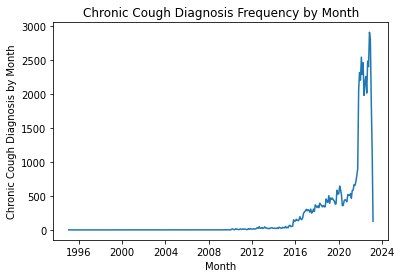

In [22]:
#count_by_day = diagnosis_R05_3.groupby('date').size()
print(count_by_month)
plt.plot(count_by_month)
plt.xlabel('Month')
plt.ylabel('Chronic Cough Diagnosis by Month')
plt.title('Chronic Cough Diagnosis Frequency by Month')
plt.show()